In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [3]:
maind = np.loadtxt('../proxy/GadgetX_DS_main')
maind = maind[loc,1:]

In [4]:
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]

In [5]:
np.corrcoef(maind[:,0], HalfMratio)

array([[1.        , 0.52512635],
       [0.52512635, 1.        ]])

<IPython.core.display.Javascript object>


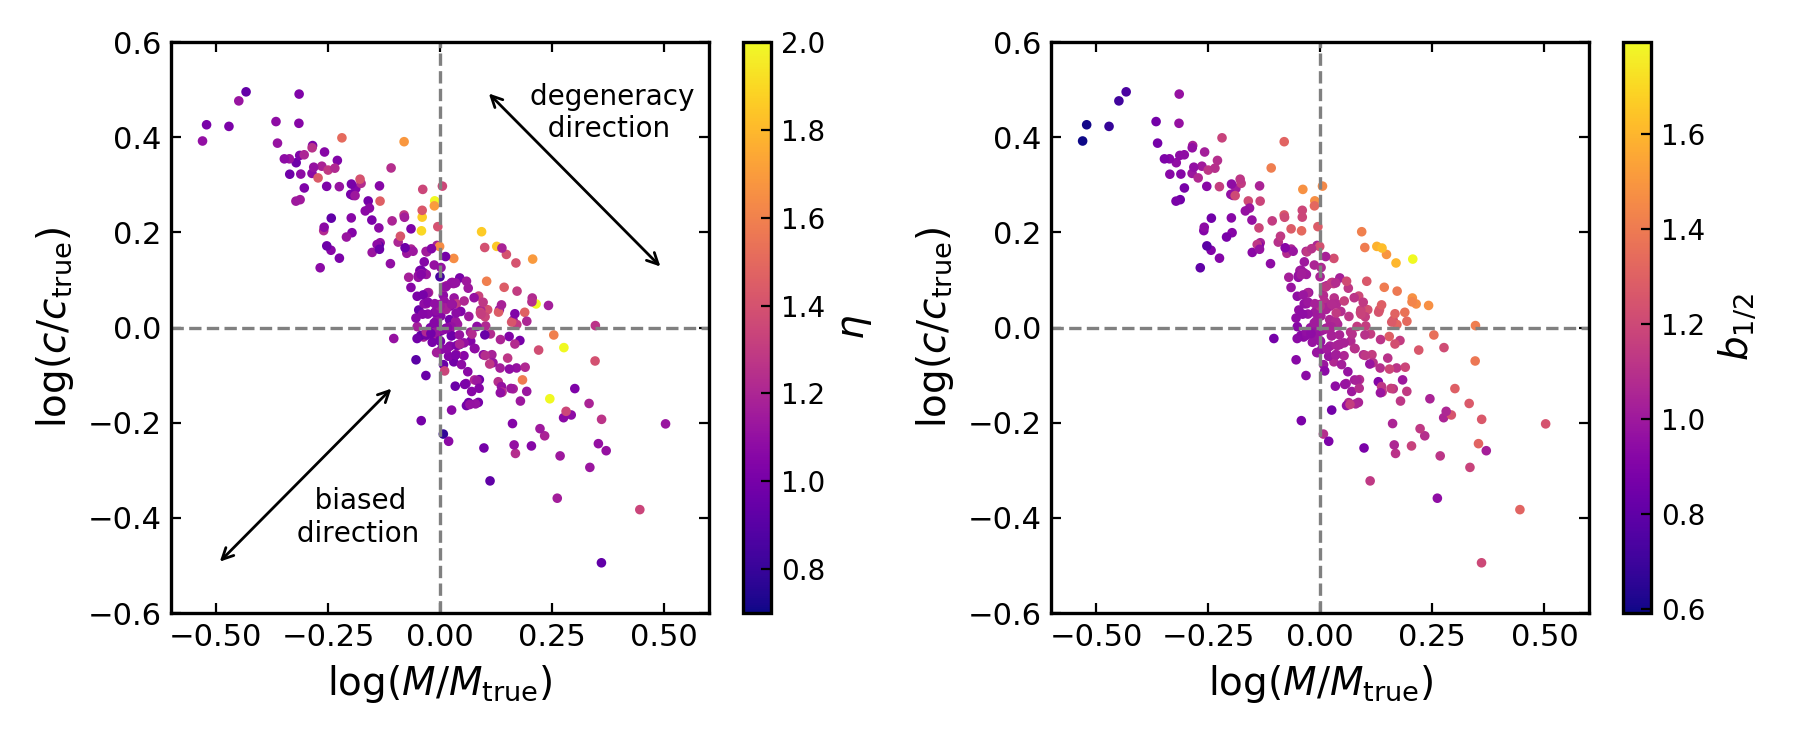

In [6]:
from matplotlib.patches import Patch
import oPDFplus as opd

def main():
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 1.2#set the value globally
    plt.figure(figsize = (9,3.7))
    
    plt.subplot(121)
    mx = mmtrue[loc]
    cy = cctrue[loc]

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top = 'on', right = 'on', which='both')
    plt.scatter(np.log10(mx),np.log10(cy),c = maind[:,0], s = 6,
        cmap = 'plasma',vmin = 0.7, vmax = 2.0)
    cbar = plt.colorbar()
    cbar.set_label(r'$\eta$', fontsize = 14)

    plt.tick_params(labelsize = 11)
    plt.axvline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.axhline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.6)
    plt.xlabel(r'$\log (M/M_{\rm true})$',fontsize = 14)
    plt.ylabel(r'$\log (c/c_{\rm true})$',fontsize = 14)
    # plt.loglog()
    
    plt.annotate("",
            xy=(-0.5, -0.5), xycoords='data',
            xytext=(-0.1, -0.12), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<->"),
            fontsize = 10
            )
    plt.annotate("",
            xy=(0.5, 0.12), xycoords='data',
            xytext=(0.1, 0.5), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle="<->"),
            fontsize = 10
            )
#     plt.annotate("",
#             xy=(-0.5, 0.5), xycoords='data',
#             xytext=(-0.1, 0.12), textcoords='data',
#             arrowprops=dict(facecolor='black', arrowstyle="<->"),
#             fontsize = 10
#             )
    plt.text(-0.34, -0.45, '   biased\n direction', fontsize = 10)
    plt.text(0.2, 0.4, 'degeneracy  \n  direction', fontsize = 10)
    
    plt.subplot(122)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in')
    plt.scatter(np.log10(mx),np.log10(cy),c = HalfMratio, s = 6,
        cmap = 'plasma')
    cbar = plt.colorbar()
    cbar.set_label(r'$b_{\rm 1/2}$', fontsize = 14)
    
    plt.tick_params(labelsize = 11)
    plt.axvline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.axhline(0, color = 'grey', lw = 1.2, ls = '--')
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.6)
    plt.xlabel(r'$\log (M/M_{\rm true})$',fontsize = 14)
    plt.ylabel(r'$\log (c/c_{\rm true})$',fontsize = 14)
    # plt.loglog()
    
    
#     import matplotlib.patches as mpatches
#     arrow = mpatches.FancyArrowPatch((-0.5, -0.5), (-0.1, -0.12),
#                                      ,
#                                  mutation_scale=100, color = 'k')
#     ax = plt.gca()
#     ax.add_patch(arrow)
    
    plt.tight_layout()
    plt.savefig('./figs/2fea.pdf')
    plt.show()

main()

In [10]:
np.corrcoef(maind[:,0], HalfMratio)

array([[1.        , 0.52512635],
       [0.52512635, 1.        ]])

<IPython.core.display.Javascript object>


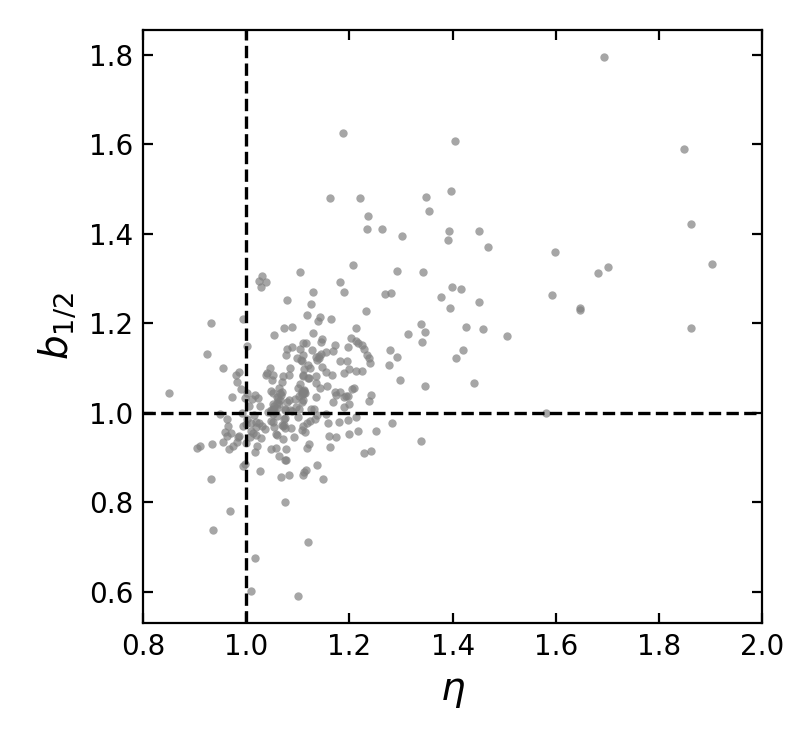

(12,)
(157,)
(91,)
(26,)
(9,)


In [7]:
plt.figure(figsize = (4.0, 3.7))

nbin = 5
xx = np.zeros(5)
yy = np.zeros(5)
err = np.zeros(5)
xerr0 = np.zeros(5)
xerr1 = np.zeros(5)
for i in range(5):
    eta0 = 0.8 + i*0.8/5
    eta1 = 0.8 + (i+1)*0.8/5
    idx = np.where((maind[:,0] >= eta0) & (maind[:,0] < eta1))[0]
    print(idx.shape)
    xx[i] = (eta0 + eta1) / 2
    yy[i] = np.mean(HalfMratio[idx])
    err[i] = np.std(HalfMratio[idx])
    xerr0[i] = eta0
    xerr1[i] = eta1
# plt.errorbar(xx,yy,yerr = err,xerr = [xx-xerr0,xerr1-xx],
#              ls = 'none', marker = 'o', c = 'magenta',zorder = 100, markersize = 4, capsize = 2)  

idx = np.where((maind[:,0] >= 1.6) & (maind[:,0] < 2.0))[0]
# plt.errorbar(1.8, np.mean(HalfMratio[idx]), yerr = np.std(HalfMratio[idx]), xerr = [0.2],
#             ls = 'none', marker = 'o', c = 'magenta',zorder = 100, markersize = 4, capsize = 2)

plt.plot(maind[:,0], HalfMratio, 'o', ms = 3, c = 'grey', alpha = 0.7, mec = 'none')

plt.xlabel(r'$\eta$', fontsize = 14)
plt.ylabel(r'$b_{1/2}$', fontsize = 14)

plt.axvline(1.0, color = 'k', lw = 1.2, ls = '--')
plt.axhline(1.0, color = 'k', lw = 1.2, ls = '--')
plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in')
plt.tight_layout()

plt.xlim(0.8,2.0)
# plt.axvline(1.15, color = 'r', lw = 1.2, ls = '--')
# plt.axvline(0.85, color = 'r', lw = 1.2, ls = '--')
# plt.xlim()

plt.savefig('./figs/b_eta.pdf')